# GIS Programming and Databases
## Assignment 2

NAME: Grey Harris
ID: 97774899


## Imports

In [2]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import matplotlib.pyplot as plt
from math import ceil
import numpy as np # you can use numpy functions with xarray objects
import glob # a library to handle path/folder/file related issues
from dask.diagnostics import ProgressBar
import geocoder
import time

In [2]:
# from pathlib import Path
# user_home = str(Path.home())
# from dask.distributed import Client
# client = Client(n_workers=16, threads_per_worker=8, memory_limit='1GB',local_directory=user_home)
# client

/opt/conda/envs/baseline/lib/python3.8/site-packages/distributed/node.py:181: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34251 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34251/status,
Dashboard: http://127.0.0.1:34251/status,Workers: 16
Total threads: 128,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33595,Workers: 16
Dashboard: http://127.0.0.1:34251/status,Total threads: 128
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:38731,Total threads: 8
Dashboard: http://127.0.0.1:46733/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:38129,


## Task 1

Monthly and annual mean wind speeds. Look at Table 1 from the Canterbury region report
and reproduce the equivalent outputs but from the WRF data you have access to. Use the
entire 20-year temporal period. Be creative in how you present the table within the notebook
environment.

Table from https://niwa.co.nz/sites/niwa.co.nz/files/Canterbury%20climate%20FINAL%20WEB.pdf

![Table1](table1.PNG)

In [3]:
# dictionary of locations from Table 1

cities = {"Le Bons Bay": None, 
    "Kaikoura": None, 
    "Lyttleton NZ": None, 
    "Christchurch NZ": None, 
    "Lake Tekapo": None, 
    "Darfield": None, 
    "Rangiora": None, 
    "Pukaki Aerodrome": None, 
    "Winchmore": None,
    "Fairlie NZ": None,
    "Aoraki Mt Cook": None,
    "Timaru": None,
    "Culverden": None,
    "Hanmer Springs": None}
               
def get_locations(locations):
    """Get lat, lon from list of locations"""
    for c in locations.keys(): 
        lat_lon = geocoder.arcgis(c).json
        locations[c] = (lat_lon['lat'], lat_lon['lng'])
    return locations

locations = get_locations(cities)
# Display lat lon pairs for sanity check
print(locations.values())

dict_values([(-43.748532867999984, 173.0719988840001), (-42.417986532999976, 173.69758517200012), (-43.605054103999976, 172.7082991750001), (-43.53033942299993, 172.63239710300002), (-44.016669999999976, 170.5000000000001), (-43.49792876599997, 172.1000423590001), (-43.30582405299998, 172.59313623700007), (-44.228339999999946, 170.11008000000004), (-43.83332999999993, 171.71667000000002), (-44.09701214699993, 170.82536218400003), (-43.73708999999997, 170.09926000000007), (-44.39705546399995, 171.2507288050001), (-42.77246916499996, 172.85048698100002), (-42.52299649999998, 172.8230347020001)])


In [4]:
# def ws_monthavg(v,u, height=0):
#     """Calculates avg windsepeed for a month using u,v windspeeds"""
#     return np.mean(np.sqrt(v.V[height, :, :, :] ** 2 + u.U[height, :, :, :] ** 2), axis=0)

In [5]:
# # get filenames
# u_files = sorted(glob.glob('/mnt/data/MetService_WRF/U_*', recursive=False)) 
# v_files = sorted(glob.glob('/mnt/data/MetService_WRF/V_*', recursive=False)) 

# #printing date range in glob, yyyy/mm/dd
# print(f"{u_files[0].split('/')[-1][2:-9]} to {u_files[0].split('/')[-1][2:-9]}")

20000101 to 20000101


In [6]:
# import sys
# print(sys.getsizeof(u_files)) # size of object at pointer, seems small 

2352


In [7]:
#ds_u = xr.open_mfdataset("/mnt/data/MetService_WRF/U_*",chunks={"time":72,"height":1},parallel=True)

In [12]:
# ds_u = xr.open_mfdataset(u_files[0:24],chunks="auto",parallel=True).groupby('time.month').mean('time')
# ds_v = xr.open_mfdataset(v_files[0:24],chunks="auto",parallel=True).groupby('time.month').mean('time')

In [13]:
# ds_v

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [4]:
# lat, lon = cities['Kaikoura']
# print(f'lat: {lat}, lon:{lon}')
# ds_u_point = ds_u.sel(height=1,lat=lat,lon=lon,method="nearest")
# ds_v_point = ds_v.sel(height=1,lat=lat,lon=lon,method="nearest")

# # having a peek
# ds_u_point

In [5]:
# # merge the two dask arrays
# df =  xr.merge([ds_u,ds_v])
# df

In [ ]:
# rechunked = df.chunk({"time": (30,)})  #Frozen({'time': 30, 'latitude': 180, 'longitude': 180})
# rechunked

In [6]:
# def ws_monthavg_df(df, height=0):
#     """Calculates avg windsepeed for each a month using u,v windspeeds"""
#     return np.mean(np.sqrt(df.V[height,] ** 2 + df.U[height,] ** 2), axis=0)

# avg_ws_df = ws_monthavg_df(df)
# avg_ws_df

In [7]:
# def ws_monthavg_df(df, height=0):
#     """Calculates avg windsepeed for each a month using u,v windspeeds"""
#     return np.mean(np.sqrt(df.V[height] ** 2 + df.U[height] ** 2), axis=0)

# avg_ws_df = ws_monthavg_df(df)
# avg_ws_df

In [8]:
# val = df.V.shape
# val

In [9]:
# df.V[0]

In [10]:
# def windspeed_dask_compute(loc, df):
#     """
#     Compute the average wind speeds at multiple sites lat/lon at 10 meters

#     Parameters
#     ----------
#     loc: Dictionary
#         Key: location names, Val: (lat,long)
#     df : Dask dataframe
#         Containing U and V windspeeds

#     Returns
#     -------
#     Dictionary
#         Key: location names, Val:(lat,long,avg_windspeed)
#     """
#     windspeed_dict = {}
#     windspeeds_df = ws_monthavg_df(df).compute() # not sure if compute will work, yeet
#     for key, value in loc.items():
#         lat, lon = value
#         ws = windspeeds_df.sel(lat=lat, lon=lon, method="nearest")
#         print(type(ws))
#         print(ws)
#         windspeed_dict[key] = (lat, lon, ws)
#     return windspeed_dict

# #windspeeds = windspeed_dask_compute(cities, df)

In [ ]:
# %%time
# with ProgressBar():
#     windspeeds = windspeed_dask_compute(cities, df)

In [ ]:
# windspeeds

In [84]:
# def windspeed_dask_compute2(loc, df):
#     """
#     Compute the average wind speeds at multiple sites lat/lon at 10 meters

#     Parameters
#     ----------
#     loc: Dictionary
#         Key: location names, Val: (lat,long)
#     df : Dask dataframe
#         Containing U and V windspeeds

#     Returns
#     -------
#     Dictionary
#         Key: location names, Val:(lat,long,avg_windspeed)
#     """
#     windspeed_dict = {}
#     for key, value in loc.items():
#         lat, lon = value
#         print(df.lat)
#         windspeeds_df = df.sel(lat=lat, lon=lon, method="nearest")
#         ws = ws_monthavg_df(windspeeds_df).compute() # not sure if compute will work, yeet
#         windspeed_dict[key] = (lat, lon, ws)
#     return windspeed_dict



In [11]:
# %%time
# with ProgressBar():
#     windspeeds = windspeed_dask_compute2(cities, df)

In [12]:
# print(windspeeds['Kaikoura'])

In [13]:
# def ws_monthavg10m_map(ary, cmap="Paired", w_range=False, ax=None):
#     """
#     creates contour map of windspeed of nz
#     ary: array of avg windspeeds
#     cmap: colour map for plotting
#     w_range: tuple of (min,max) values to threshold map
#     result: projection of windspeeds
#     """
#     if w_range:
#         ary.salem.quick_map(cmap=cmap, vmin=w_range[0],vmax=w_range[1])
#     else:
#         ary.salem.quick_map(cmap=cmap, ax=ax)

# ws_monthavg10m_map(avg_ws_df)

In [15]:
# loading and checking what one of the results looks like
data = xr.open_mfdataset(f'wsChristchurch NZ2.nc') # The numbers wont match main table as this was a quick 1 year 2000-2001 job for testing
months = data.groupby('time.month').mean('time')
months.to_pandas()

,lat,lon,height,__xarray_dataarray_variable__
month,,,,
1,-43.5288,172.624,10.0,3.208389
2,-43.5288,172.624,10.0,2.916809
3,-43.5288,172.624,10.0,2.650110
4,-43.5288,172.624,10.0,2.277388
5,-43.5288,172.624,10.0,2.203749
6,-43.5288,172.624,10.0,2.123214
7,-43.5288,172.624,10.0,2.071805
8,-43.5288,172.624,10.0,2.243197
9,-43.5288,172.624,10.0,2.656658


In [16]:
# loading and checking what one of the results looks like
data = xr.open_mfdataset(f'wsChristchurch NZ2.nc') #f"wsAoraki Mt Cook.nc"
months = data.groupby('time.year').mean('time')
months.to_pandas()

,lat,lon,height,__xarray_dataarray_variable__
year,,,,
2000,-43.5288,172.624,10.0,2.595813
2001,-43.5288,172.624,10.0,2.438325
2002,-43.5288,172.624,10.0,2.794212
2003,-43.5288,172.624,10.0,2.608408
2004,-43.5288,172.624,10.0,2.780139
2005,-43.5288,172.624,10.0,2.437347
2006,-43.5288,172.624,10.0,2.802505
2007,-43.5288,172.624,10.0,2.527848
2008,-43.5288,172.624,10.0,2.682758


In [ ]:
# following code loads my checkpoints gets montly means and creates a nested list for plotting
monthly_ws_data = []
for key in windspeed_dict:
    #print(f'ws{key}.nc')
    data = xr.open_mfdataset(f'ws{key}2.nc') #f"wsAoraki Mt Cook.nc" 
    monthly_data = data.groupby('time.month').mean('time')
    x = monthly_data.to_pandas()["__xarray_dataarray_variable__"]
    ary = [key]
    for i in range(1,13):
        ary.append(x[i])
    monthly_ws_data.append(ary)

# peek first entry
monthly_ws_data[0]

In [ ]:
from prettytable import PrettyTable

pretty = PrettyTable()
pretty.field_names = ['Location', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pretty.add_rows(monthly_ws_data)
print(pretty)

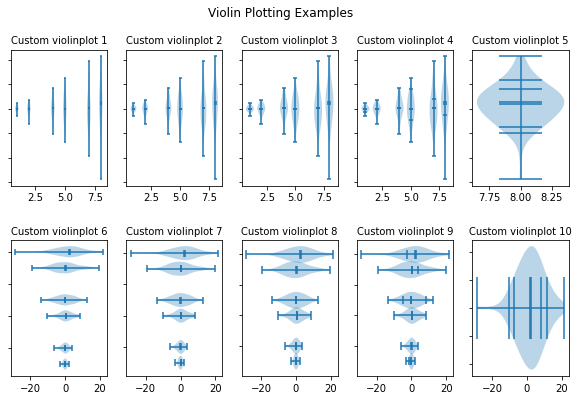

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

axs[0, 0].violinplot(data, pos, points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axs[0, 1].violinplot(data, pos, points=40, widths=0.5,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method='silverman')
axs[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axs[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axs[0, 3].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                     showextrema=True, showmedians=True, bw_method=0.5,
                     quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
axs[0, 3].set_title('Custom violinplot 4', fontsize=fs)

axs[0, 4].violinplot(data[-1:], pos[-1:], points=60, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
axs[0, 4].set_title('Custom violinplot 5', fontsize=fs)

axs[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True)
axs[1, 0].set_title('Custom violinplot 6', fontsize=fs)

axs[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method='silverman')
axs[1, 1].set_title('Custom violinplot 7', fontsize=fs)

axs[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method=0.5)
axs[1, 2].set_title('Custom violinplot 8', fontsize=fs)

axs[1, 3].violinplot(data, pos, points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]],
                     bw_method=0.5)
axs[1, 3].set_title('Custom violinplot 9', fontsize=fs)

axs[1, 4].violinplot(data[-1:], pos[-1:], points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
axs[1, 4].set_title('Custom violinplot 10', fontsize=fs)


for ax in axs.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

## Task 2

Violin plots. Explore how to produce violin distribution plots from
(https://matplotlib.org/stable/gallery/statistics/violinplot.html) using the matplotlib library.
Construct one violin plot for each of the town/city centres of table 1. The violin plot will use
the hourly data outputs and not the monthly/annual means.

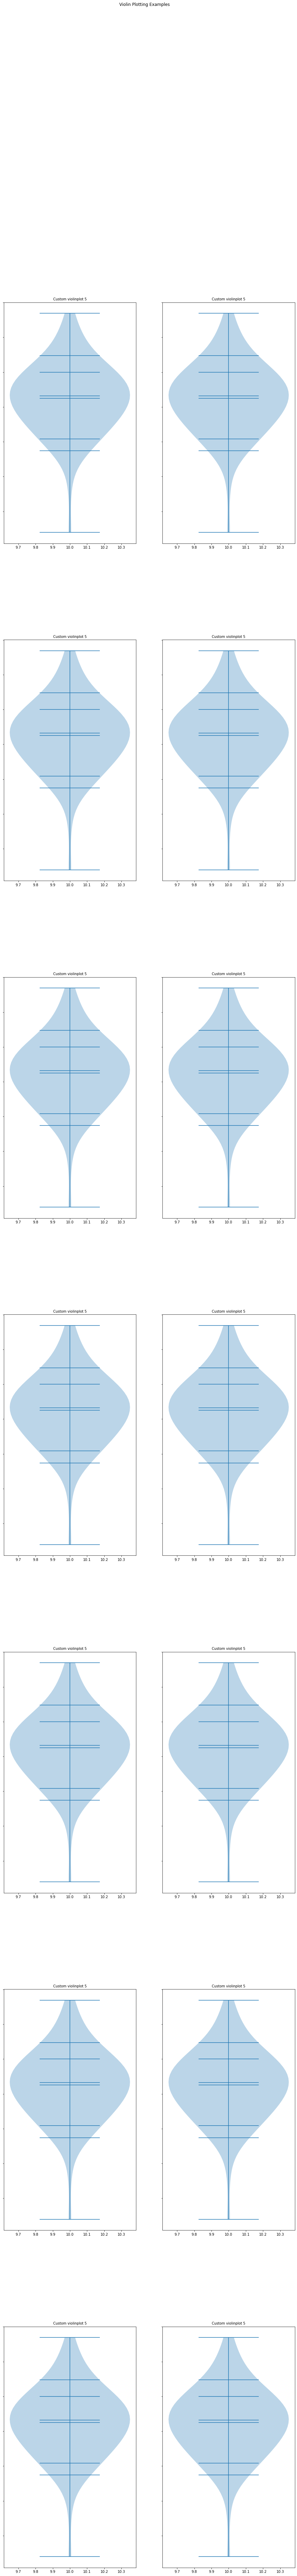

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [0, 2, 4, 6, 8, 10]
data = [np.random.normal(0, std, size=100) for std in pos]
nrows, ncols = 7, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 120))

for i in range(0, ncols):
    for j in range(0, nrows):
#         axs[j, i].violinplot(data, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)
#         axs[j, i].set_title(f'i:{i}, j:{j}', fontsize=fs)
        axs[j, i].violinplot(data[-1:], pos[-1:], points=60, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
        axs[j, i].set_title('Custom violinplot 5', fontsize=fs)


# axs[0, 0].violinplot(data, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)
# axs[0, 0].set_title('Custom violinplot 1', fontsize=fs)

# axs[0, 1].violinplot(data, pos, points=40, widths=0.5,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      bw_method='silverman')
# axs[0, 1].set_title('Custom violinplot 2', fontsize=fs)

# axs[1, 0].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
#                      showextrema=True, showmedians=True, bw_method=0.5)
# axs[1, 0].set_title('Custom violinplot 3', fontsize=fs)

# axs[1, 1].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
#                      showextrema=True, showmedians=True, bw_method=0.5,
#                      quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
# axs[1, 1].set_title('Custom violinplot 4', fontsize=fs)

# axs[0, 4].violinplot(data[-1:], pos[-1:], points=60, widths=0.7,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
# axs[0, 4].set_title('Custom violinplot 5', fontsize=fs)

# axs[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
#                      showmeans=True, showextrema=True, showmedians=True)
# axs[1, 0].set_title('Custom violinplot 6', fontsize=fs)

# axs[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      bw_method='silverman')
# axs[1, 1].set_title('Custom violinplot 7', fontsize=fs)

# axs[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      bw_method=0.5)
# axs[1, 2].set_title('Custom violinplot 8', fontsize=fs)

# axs[1, 3].violinplot(data, pos, points=200, vert=False, widths=1.1,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]],
#                      bw_method=0.5)
# axs[1, 3].set_title('Custom violinplot 9', fontsize=fs)

# axs[1, 4].violinplot(data[-1:], pos[-1:], points=200, vert=False, widths=1.1,
#                      showmeans=True, showextrema=True, showmedians=True,
#                      quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
# axs[1, 4].set_title('Custom violinplot 10', fontsize=fs)


for ax in axs.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
locations = ["Le Bons Bay", 
             "Kaikoura", 
             "Lyttleton NZ", 
             "Christchurch NZ", 
             "Lake Tekapo", 
             "Darfield", 
             "Rangiora", 
             "Pukaki Aerodrome", 
             "Winchmore",
             "Fairlie NZ",
             "Aoraki Mt Cook",
             "Timaru",
             "Culverden",
             "Hanmer Springs"]
# Create figure with 14 axes
rows, cols = 7, 2
fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(10, 30))
print(ax[i])
print(len(ax))

count = 0
for i in range(rows):
    for j in range(cols):
        dataframe = xr.open_mfdataset(f'ws_{locations[count]}.nc').to_pandas().dropna()
        ax[i][j].violinplot(dataframe.__xarray_dataarray_variable__, showmedians=True, points=20, widths=0.3,)
#                      showmeans=True, showextrema=True, showmedians=True)
        if locations[count].endswith("Z"):
            title = locations[count][:-3]
        else:
            title = locations[count]
        ax[i][j].set_title(f'{title}')
        count += 1
# for ax in axs.flat:
#     ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

## Task 3

Median annual average temperature. Look at Figure 12 of the Canterbury region climate
report and Figure 13 of the New Zealand wide climate report. Reproduce the median annual
average temperature for both the New Zealand national scale and the Canterbury regional
scale. Make sure you use appropriate figure sizes and choose a color scale and range that is as
close as possible to the one shown in NIWA reports. You don’t have to use an topographic
data/map underlay, but try to crop for the terrestrial region of the data.

## TASK 4

Repeat (3) but for median annual total rainfall. Please note that annual total rainfall is the
sum of the hourly rainfall in millimetres.

In [1]:
a = 'string'

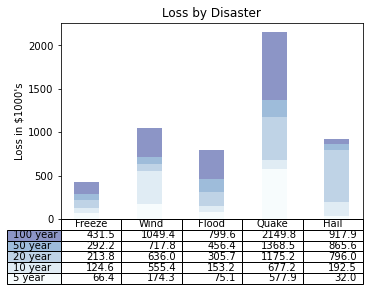

In [2]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [ ]:
months 

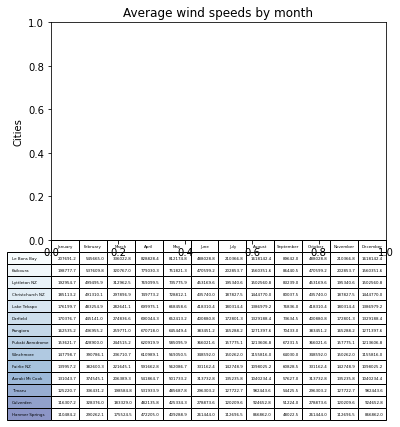

In [41]:
import numpy as np
import matplotlib.pyplot as plt

data = [[ 66386, 174296,  75131, 577908,  32015, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 58230, 381139,  78045,  99308, 160454, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 89135,  80552, 152558, 497981, 603535, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 58230, 381139,  78045,  99308, 160454, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 89135,  80552, 152558, 497981, 603535, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 78415,  81858, 150656, 193263,  69638, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 58230, 381139,  78045,  99308, 160454, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 89135,  80552, 152558, 497981, 603535, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 78415,  81858, 150656, 193263,  69638, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 58230, 381139,  78045,  99308, 160454, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 89135,  80552, 152558, 497981, 603535, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 78415,  81858, 150656, 193263,  69638, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 58230, 381139,  78045,  99308, 160454, 174296,  75131, 577908,  32015, 174296,  75131, 577908],
        [ 89135,  80552, 152558, 497981, 603535, 174296,  75131, 577908,  32015, 174296,  75131, 577908],]

columns = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
rows = ["Le Bons Bay", "Kaikoura", "Lyttleton NZ", "Christchurch NZ", "Lake Tekapo", "Darfield" , "Rangiora", "Pukaki Aerodrome", "Winchmore", "Fairlie NZ", "Aoraki Mt Cook", "Timaru", "Culverden", "Hanmer Springs" ]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns)

plt.ylabel("Cities".format(value_increment))

plt.title('Average wind speeds by month')

plt.show()

In [43]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import matplotlib.pyplot as plt
from math import ceil
import numpy as np # you can use numpy functions with xarray objects
import glob # a library to handle path/folder/file related issues
from dask.diagnostics import ProgressBar
import geocoder
import time

In [ ]:
data = xr.open_mfdataset(f'ws{key}.nc')

In [ ]:
ds_u = xr.open_mfdataset(u_files[0:24],
                             chunks={"time" : 1000, "height": 1},
                             preprocess=select_site, 
                             parallel=True)

In [46]:
x = xr.open_mfdataset(f"wsDarfield2.nc")

In [4]:
x.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                        (time: 17544)
Coordinates:
  * time                           (time) datetime64[ns] 2000-01-01 ... 2001-...
    lat                            float64 ...
    lon                            float64 ...
    height                         float64 ...
Data variables:
    __xarray_dataarray_variable__  (time) float32 dask.array<chunksize=(17544,), meta=np.ndarray>>

In [9]:
y = x.groupby('time.month').mean('time')

In [19]:
y.to_pandas()

,lat,lon,height,__xarray_dataarray_variable__
month,,,,
1,-42.4248,173.7004,10.0,4.161472
2,-42.4248,173.7004,10.0,3.847546
3,-42.4248,173.7004,10.0,4.089087
4,-42.4248,173.7004,10.0,3.348405
5,-42.4248,173.7004,10.0,3.600747
6,-42.4248,173.7004,10.0,3.620214
7,-42.4248,173.7004,10.0,NaN
8,-42.4248,173.7004,10.0,3.212440
9,-42.4248,173.7004,10.0,3.634598


In [17]:
y.month[0]

<xarray.DataArray 'month' ()>
array(1)
Coordinates:
    lat      float64 ...
    lon      float64 ...
    height   float64 ...
    month    int64 1